In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df1=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')

In [4]:
col_names=df.columns.tolist()
print("Column names:",col_names)

Column names: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


1.There were Space in Chance of Admit Variable

2.Serial No has Full stop Sign name it as no

In [5]:
df=df.rename(columns={'Serial No.':'Serial_No','GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_rating','LOR ':'LOR'
                     ,'Chance of Admit ':'Chance_of_Admit'})

In [6]:
print(df.shape)
print(df1.shape)

(500, 9)
(400, 9)


Data has 500 rows and 9 columns

In [7]:
df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.isnull().sum()

Serial_No            0
GRE_Score            0
TOEFL_Score          0
University_rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

We dont have any null values in data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [10]:
df.nunique()

Serial_No            500
GRE_Score             49
TOEFL_Score           29
University_rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance_of_Admit       61
dtype: int64

The parameters included are :

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

University_Rating,Research,SOP,LOR,can be considered as Categorical Variables

In [11]:
cat_cols=['University_rating','Research','SOP','LOR']

In [12]:
df[cat_cols]=df[cat_cols].astype('category')

In [13]:
df.dtypes

Serial_No               int64
GRE_Score               int64
TOEFL_Score             int64
University_rating    category
SOP                  category
LOR                  category
CGPA                  float64
Research             category
Chance_of_Admit       float64
dtype: object

Visualizations

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

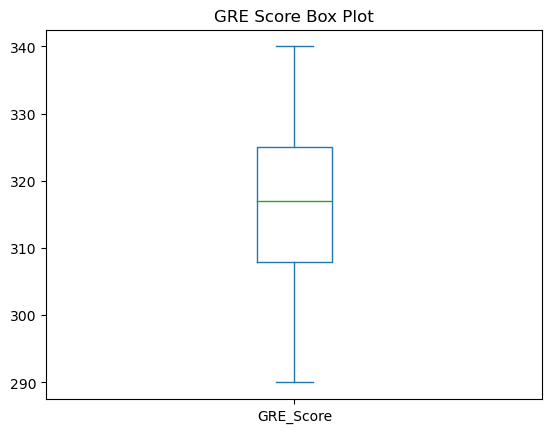

In [15]:
df['GRE_Score'].plot(kind='box', title="GRE Score Box Plot")
plt.show()

In [16]:
print("Minimum GRE Score : ", df['GRE_Score'].min())
print("Maximum GRE Score : ", df['GRE_Score'].max())
print("Average GRE Score : ", df['GRE_Score'].mean())
print("Std GRE Score : ", df['GRE_Score'].std())

Minimum GRE Score :  290
Maximum GRE Score :  340
Average GRE Score :  316.472
Std GRE Score :  11.2951483723547


In [17]:
df['University_rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University_rating, dtype: int64

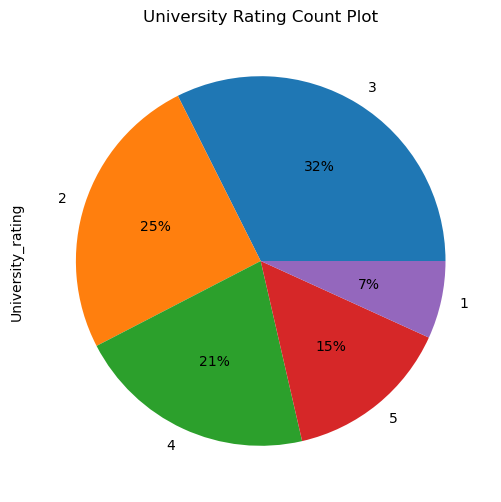

In [18]:
df['University_rating'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="University Rating Count Plot")
plt.show()

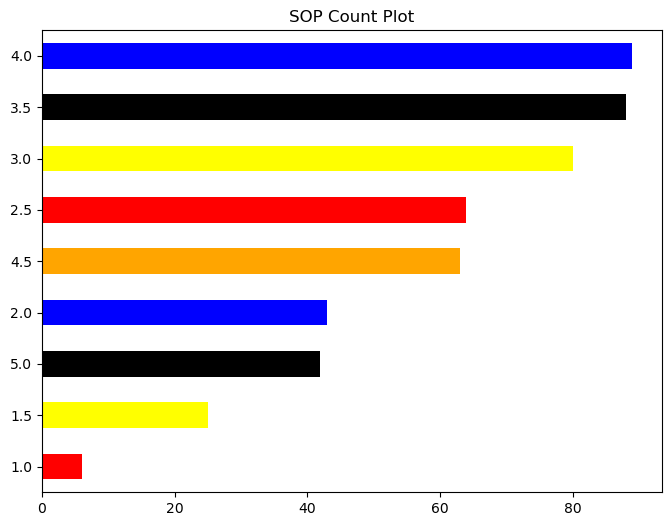

In [19]:
df['SOP'].value_counts().sort_values().plot(kind='barh',figsize=(8,6),
                                            title="SOP Count Plot",color = ['red', 'yellow', 'black', 'blue', 'orange'])
plt.show()

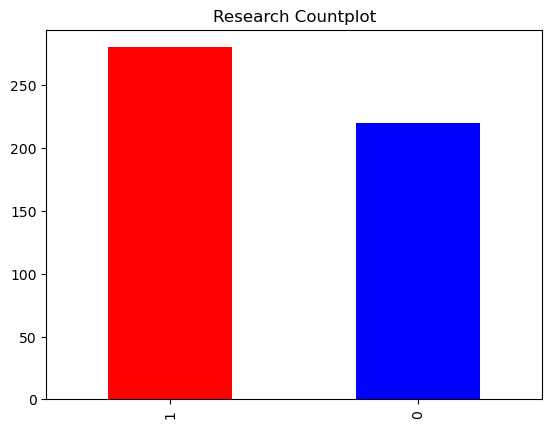

In [20]:
df.Research.value_counts().plot(kind='bar',title="Research Countplot",color=["red","blue"])
plt.show()

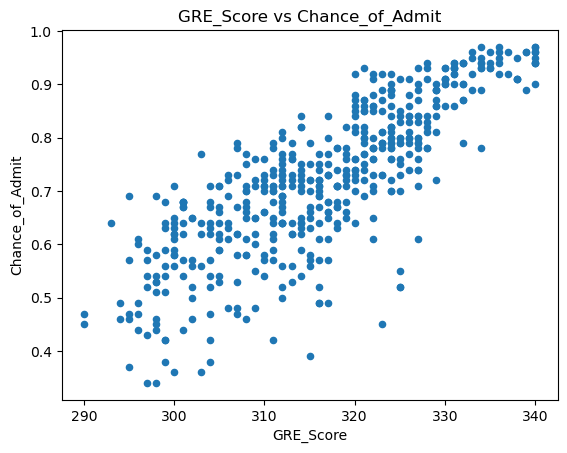

In [21]:
df.plot(kind="scatter", x='GRE_Score', y = 'Chance_of_Admit', title="GRE_Score vs Chance_of_Admit")
plt.show()

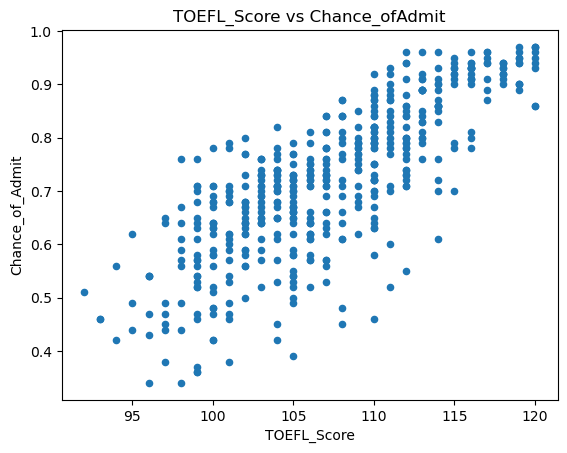

In [22]:
df.plot(kind="scatter", x='TOEFL_Score', y = 'Chance_of_Admit' , title="TOEFL_Score vs Chance_ofAdmit")
plt.show()

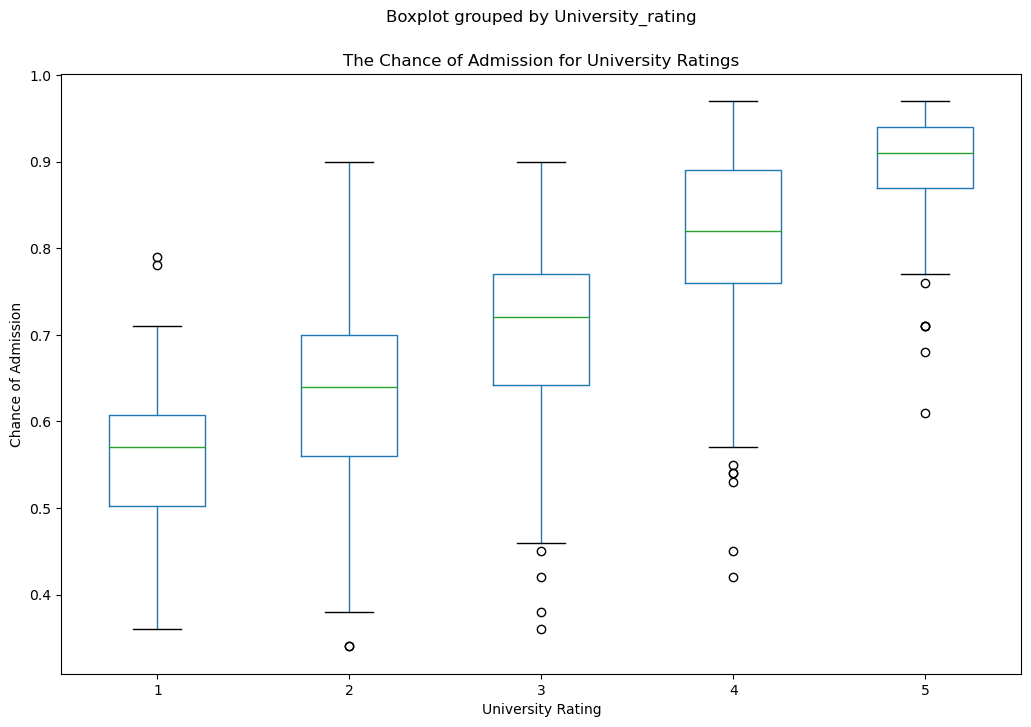

In [23]:
df.boxplot(column='Chance_of_Admit',by='University_rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

In [24]:
df.drop(columns='Serial_No', inplace = True)

In [25]:
Y=df['Chance_of_Admit']

In [26]:
X=df.drop(['Chance_of_Admit'],axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=70)

##**Encoding**

#As we Categorical Attributes in data set.That attributes are stored in Cat_cols so we do encoding.   

#Ways to deal with categorical variables..

#1.Using get_dummies function

#2.One-hotEncoding

#3.labelEncoding

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

Standardization and Normalization are two ways to deal with numerical columns.

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lets fit simple linear regression model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
r2_score(Y_test, y_pred)

0.8065157752864474